## Notation

| General Notation | Description | Python (if applicable) |
|:----------------:|:-----------:|:----------------------:|
|      $a$         | scalar, non-bold | |
|  $\mathbf{a}$   | vector, bold | |
|  $\mathbf{A}$   | matrix, bold capital | |
| **Regression** | | |
|  $\mathbf{X}$   | training example matrix | `X_train` |
|  $\mathbf{y}$   | training example targets | `y_train` |
| $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | `X[i]`, `y[i]` |
|        $m$       | number of training examples | `m` |
|        $n$       | number of features in each example | `n` |
|  $\mathbf{w}$   | parameter: weight | `w` |
|        $b$       | parameter: bias | `b` |
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the Model evaluation at $\mathbf{x}^{(i)}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$ | `f_wb` |
| $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ | the gradient or partial derivative of cost with respect to parameter $w_j$ | `dj_dw[j]` |
| $\frac{\partial J(\mathbf{w},b)}{\partial b}$ | the gradient or partial derivative of cost with respect to parameter $b$ | `dj_db` |


# Problem statement
## Training set:
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | 

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt

### Define training set

In [44]:
data=np.loadtxt("../data/houses.txt", delimiter=',',skiprows=1)
X_train=data[:,:4]
y_train=data[:,4]

X_features=['Size(sqft)','bedrooms','floors','age']

Let's view the dataset and features by plotting each feature vs price

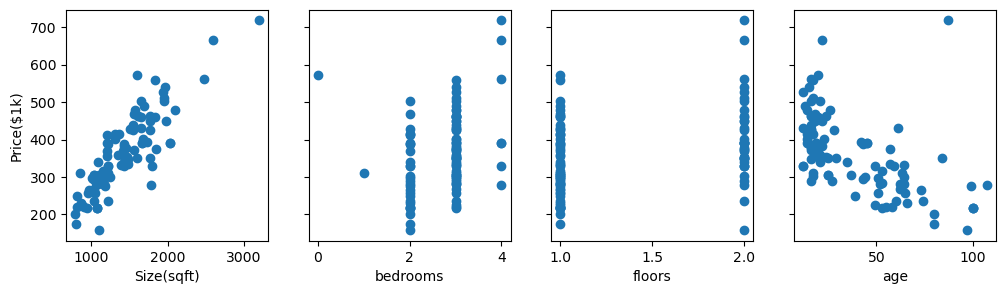

In [45]:
# sharey=True makes all subplots share the same Y-axis scale, for easier comparison.
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Price($1k)')

plt.show()

### Define number of training example and features

In [46]:
m,n=X_train.shape;

print(m)
print(n)

99
4


### Cost function

In [47]:
def cost_function(X,y,w,b):
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(w,X[i]) + b
        cost+=(f_wb_i - y[i])**2
    
    cost/=(2*m)

    # cost is often computed as a result of matrix operations (e.g., mean 
    # squared error), and it might end up with shape like:
    # (1,), (1, 1), or (m, 1) when you're expecting a scalar.
    # So np.squeeze(cost) helps flatten or simplify the result so that you can:

    return(np.squeeze(cost))

### Compute gradient

In [48]:
def compute_gradient(X,y,w,b):
    # , Makes it a 1D array, not a scalar or 0D
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        err=(np.dot(w,X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        dj_db+=err
    dj_dw/=m
    dj_db/=m

    return dj_dw,dj_db

### Gradient descent

In [49]:
import copy, math

def gradient_descent(X,y,w_in,b_in,alpha,numiters):
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"]=[]
    hist["params"]=[]
    hist["grads"]=[]
    hist["iter"]=[]

    w=copy.deepcopy(w_in)
    b=b_in

    save_interval = np.ceil(numiters/10000)

    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(numiters):
        dj_dw,dj_db=compute_gradient(X,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        # Save cost J,w,b at each save interval for graphing
        if i==0 or i%save_interval==0:
            hist["cost"].append(cost_function(X,y,w,b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        if i% math.ceil(numiters/10) == 0:
            cst=cost_function(X,y,w,b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")

    return w,b,hist

In [50]:
def run_gradient_descent(X,y,it=1000,alpha=1e-6):
    initial_w=np.zeros(n)
    initial_b=0

    w_out,b_out,hist_out=gradient_descent(X,y,initial_w,initial_b,alpha,it)

    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")

    return(w_out, b_out, hist_out)

## Learing rate

### $\alpha$ = 9.9e-7

In [51]:
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

It appears the learning rate is too high.  The solution does not converge. Cost is *increasing* rather than decreasing. Let's plot the result:

In [52]:
def plot_cost_i_w(hist):
    costs=hist["cost"]
    params=hist["params"]

    # Extract w[0] from params
    # p[0] is w and p[0][0] is w[0]
    w0=[p[0][0] for p in params]

    plt.figure(figsize=(13,4))

    plt.subplot(1,2,1)
    plt.plot(hist["iter"],costs,'b-',linewidth=3)
    plt.title('Cost vs Iteration')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

    plt.subplot(1,2,2)
    wrange=np.linspace(min(w0)-0.5,max(w0)+0.5,20)
    costw0 = [cost_function(X_train, y_train, np.array([w, 0, 0, 0]), 0) for w in wrange]
    plt.plot(wrange,costw0,'b-',linewidth=2)

    # Gradient descent path
    plt.plot(w0,costs,'orange',linewidth=4)
    plt.title("Cost vs w[0]")
    plt.xlabel("w[0]")
    plt.ylabel("Cost")

    plt.show()


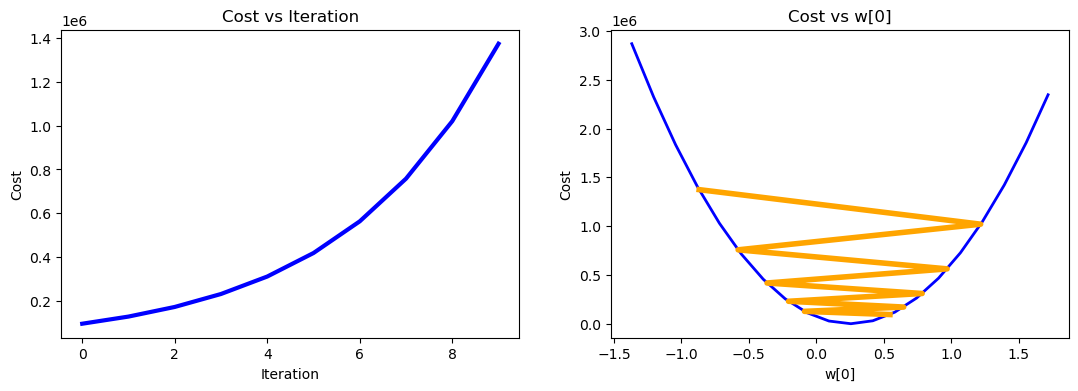

In [53]:
plot_cost_i_w(hist)

The plot on the right shows the value of one of the parameters, $w_0$. At each iteration, it is overshooting the optimal value and as a result, cost ends up *increasing* rather than approaching the minimum. Note that this is not a completely accurate picture as there are 4 parameters being modified each pass rather than just one. This plot is only showing $w_0$ with the other parameters fixed at benign values. In this and later plots you may notice the blue and orange lines being slightly off.

### $\alpha$ = 9e-7
Let's try a bit smaller value and see what happens.

In [54]:
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

Cost is decreasing throughout the run showing that alpha is not too large. 

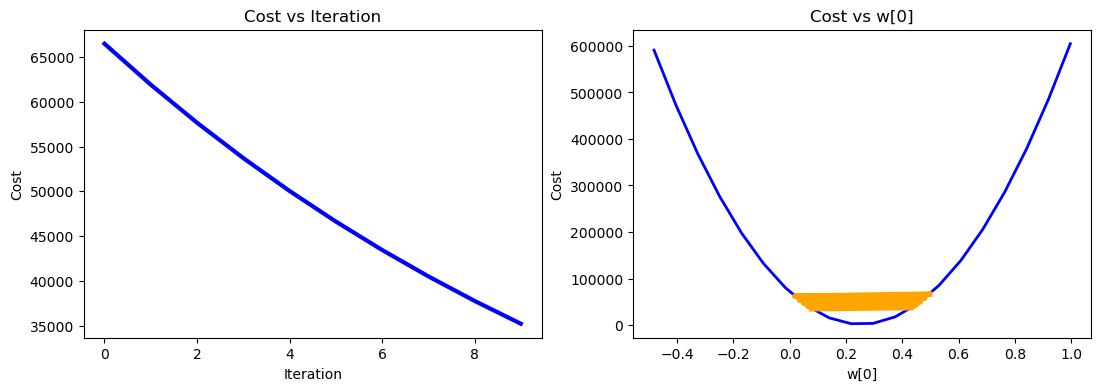

In [55]:
plot_cost_i_w(hist)

On the left, you see that cost is decreasing as it should. On the right, you can see that $w_0$ is still oscillating around the minimum, but it is decreasing each iteration rather than increasing. Note above that `dj_dw[0]` changes sign with each iteration as `w[0]` jumps over the optimal value.
This alpha value will converge. You can vary the number of iterations to see how it behaves.

### $\alpha$ = 1e-7
Let's try a bit smaller value for $\alpha$ and see what happens.

In [56]:
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

Cost is decreasing throughout the run showing that $\alpha$ is not too large. 

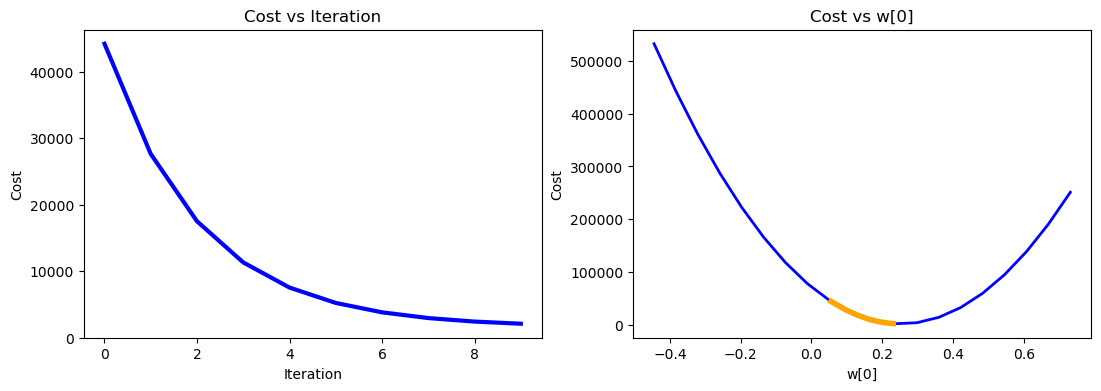

In [57]:
plot_cost_i_w(hist)

On the left, you see that cost is decreasing as it should. On the right you can see that $w_0$ is decreasing without crossing the minimum. Note above that `dj_w0` is negative throughout the run. This solution will also converge, though not quite as quickly as the previous example.

## Feature scaling

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

In [58]:
def zScoreNormExm():
    # axis=0 means: compute the mean column-wise
    mu=np.mean(X_train,axis=0)
    sigma=np.std(X_train,axis=0)
    print(f"The mean for each feature: {mu}")
    print(f"The standard deviation for each feature: {sigma}")
    X_mean=(X_train-mu)
    X_norm=(X_train-mu)/sigma

    fig,ax=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle("distribution of features before, during, after normalization")

    ax[0].scatter(X_train[:,0],X_train[:,3])
    ax[0].set_title("Unnormalized")
    ax[0].set_xlabel(X_features[0])
    ax[0].set_ylabel(X_features[3])
    ax[0].axis('equal')

    ax[1].scatter(X_mean[:,0],X_mean[:,3])
    ax[1].set_title(r"X - $\mu$")
    ax[1].set_xlabel(X_features[0])
    ax[1].set_ylabel(X_features[3])
    ax[1].axis('equal')

    ax[2].scatter(X_norm[:,0],X_norm[:,3])
    ax[2].set_title("Z-score normalized")
    ax[2].set_xlabel(X_features[0])
    ax[2].set_ylabel(X_features[3])
    ax[2].axis('equal')

    # Automatically adjusts the spacing between subplots to prevent overlapping text (like labels, titles, ticks).
    plt.tight_layout()
    plt.show()

The mean for each feature: [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01]
The standard deviation for each feature: [411.61562893   0.65196523   0.48631932  25.77788069]


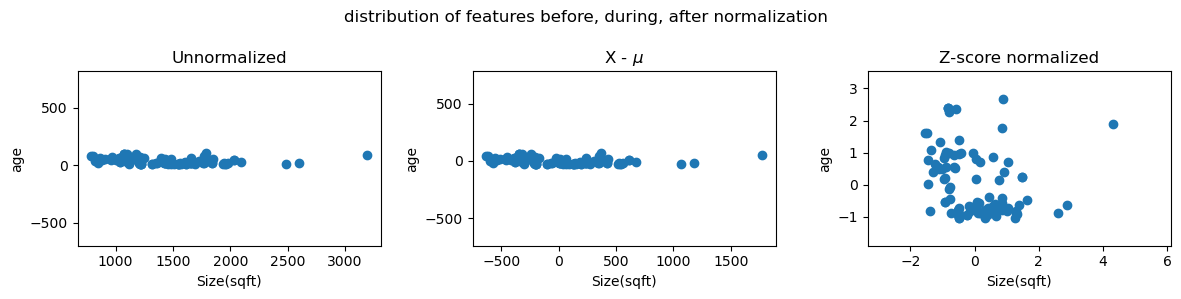

In [59]:
zScoreNormExm()

### Z-score normalization function

In [60]:
def zscorenorm(X):

    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)

    X_norm=(X-mu)/sigma

    return X_norm, mu, sigma

Let's normalize the data and compare it to the original data.

In [61]:
X_norm,X_mu,X_sigma=zscorenorm(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

In [62]:
from scipy.stats import norm
def normal_plot(ax,data):
    
    # Plot histogram
    ax.hist(data, bins=20, density=True, color='dodgerblue', edgecolor='white')

    # get mean/std
    mu=np.mean(data)
    std=np.std(data)

    # Create x values and normal PDF
    scale = (np.max(data) - np.min(data))*0.2
    x_vals = np.linspace(min(data)-scale, max(data)+scale, 50)
    y_vals = norm.pdf(x_vals, mu, std)

    # Plot normal distribution curve
    ax.plot(x_vals, y_vals, color='orangered', linewidth=2)

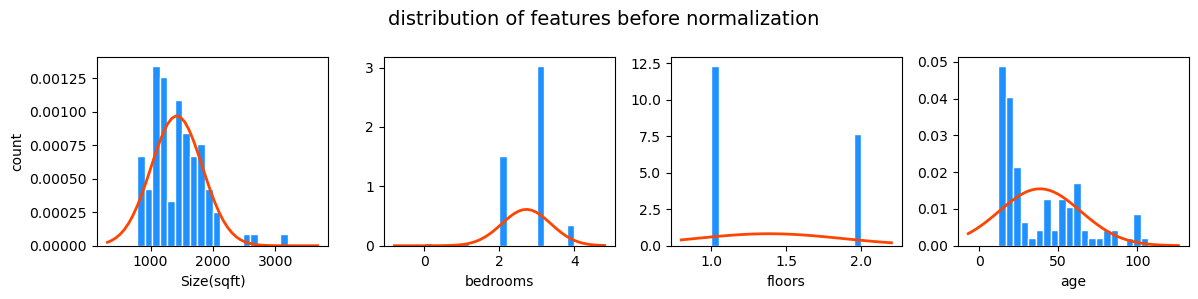

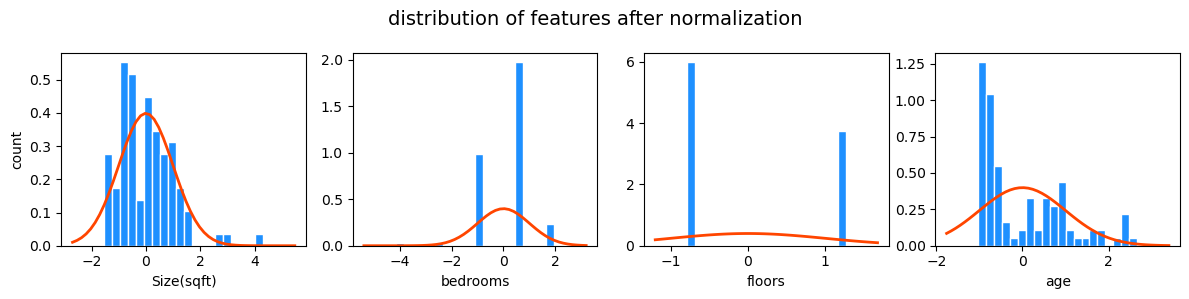

In [63]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle("distribution of features before normalization", fontsize=14)

for i in range(len(ax)):
    normal_plot(ax[i],X_train[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle("distribution of features after normalization", fontsize=14)

for i in range(len(ax)):
    normal_plot(ax[i],X_norm[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
plt.tight_layout()
plt.show()


Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.

Let's re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.

In [64]:
w_norm,b_norm,hist=run_gradient_descent(X_norm,y_train,1000,1.0e-1)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.

Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

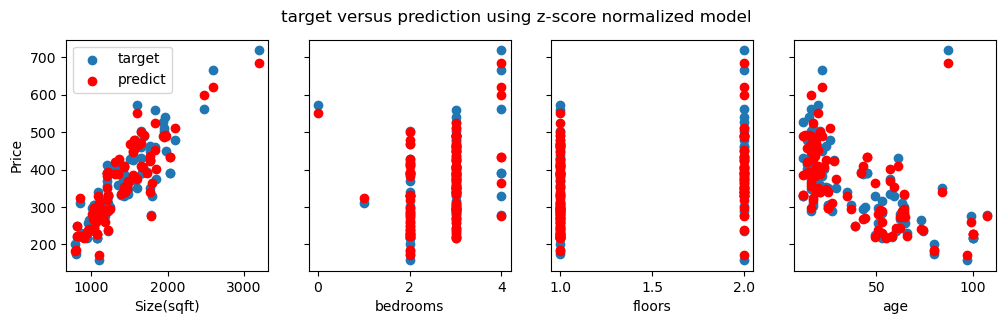

In [65]:
yp=np.zeros(m)
for i in range(m):
    yp[i]=np.dot(X_norm[i],w_norm)+b_norm

fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
fig.suptitle("target versus prediction using z-score normalized model")

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='target')
    ax[i].set_xlabel(X_features[i])

    ax[i].scatter(X_train[:,i],yp,c='r',label="predict")

ax[0].set_ylabel("Price")
ax[0].legend()
plt.show()

The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized. 

In [66]:
x_house=np.array([1200,3,1,40])

x_house_norm=(x_house-X_mu)/X_sigma

print(x_house_norm)

yhouse=np.dot(x_house_norm,w_norm)+b_norm

print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${yhouse*1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234  0.06269567]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


### Cost Contours

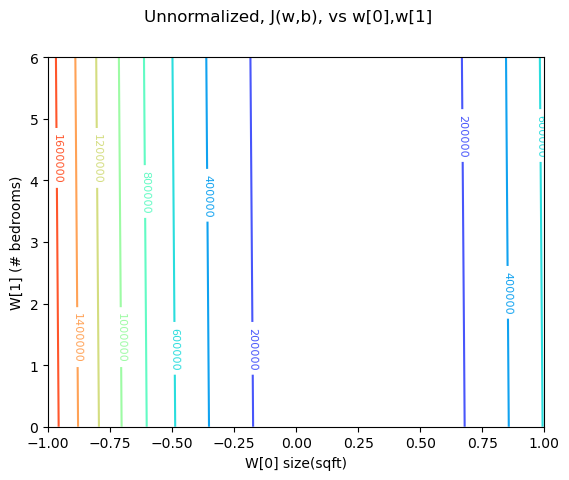

In [67]:
w0=np.linspace(-1,1,100)
w1=np.linspace(0,6,100)

W0,W1=np.meshgrid(w0,w1)

jwb=np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w=np.array([W0[i,j],W1[i,j],0,0])
        jwb[i,j]=cost_function(X_train,y_train,w,0)

cp=plt.contour(W0,W1,jwb,levels=10,cmap='rainbow')
plt.clabel(cp,inline=True,fontsize=8)
plt.suptitle("Unnormalized, J(w,b), vs w[0],w[1]")
plt.xlabel("W[0] size(sqft)")
plt.ylabel("W[1] (# bedrooms)")
plt.show()

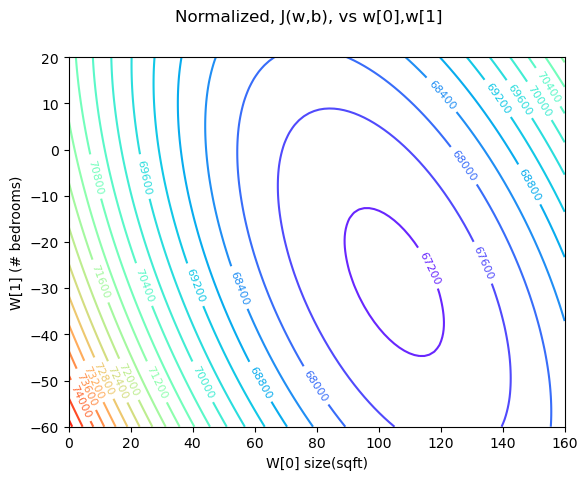

In [68]:
w0=np.linspace(0,160,100)
w1=np.linspace(-60,20,100)

W0,W1=np.meshgrid(w0,w1)

jwb=np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w=np.array([W0[i,j],W1[i,j],0,0])
        jwb[i,j]=cost_function(X_norm,y_train,w,0)

cp=plt.contour(W0,W1,jwb,levels=20,cmap='rainbow')
plt.clabel(cp,inline=True,fontsize=8)
plt.suptitle("Normalized, J(w,b), vs w[0],w[1]")
plt.xlabel("W[0] size(sqft)")
plt.ylabel("W[1] (# bedrooms)")
plt.show()